<a href="https://colab.research.google.com/github/achiral/mosaic_art/blob/draft1/gh_mosaic_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### github clone

In [6]:
!git clone https://github.com/achiral/mosaic_art.git

fatal: destination path 'mosaic_art' already exists and is not an empty directory.


### preparation

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# make dataset directories
!mkdir ./dataset
!mkdir /content/output

# material: blocks.zip
# !cp "./gdrive/MyDrive/dataset/blocks.zip" "./dataset"

# target image (*.png, *.jpg)
# !cp "./gdrive/MyDrive/dataset/target.png" "./dataset"

# unzip material dataset
!unzip ./dataset/blocks.zip -d ./dataset
!unzip ./mosaic_art/blocks.zip -d ./dataset

# count data
!find dataset/* -type f | wc -l

### show target image

In [8]:
# !ls /content/dataset/blocks/

<<sample of material image>>


<<target image>>


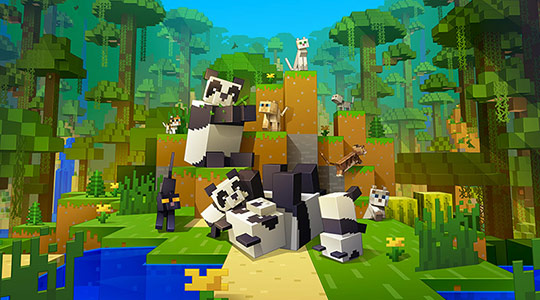

In [9]:
from IPython.display import *
print("<<sample of material image>>")
display_png(Image('/content/dataset/blocks/acacia_trapdoor.png'))
display_png(Image('/content/dataset/blocks/amethyst_block.png'))
display_png(Image('/content/dataset/blocks/amethyst_cluster.png'))
print("<<target image>>")
display_jpeg(Image('/content/mosaic_art/target.jpg'))

In [10]:
# import modules
import cv2, os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
from glob import glob
%matplotlib inline

# define function
def show_images_glob(images, figsize=(20,10), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(cv2.imread(image))

In [11]:
SOURCE_IMAGES = "/content/dataset/blocks"
FILE_PATTERN = "wool_*.png"  # filtering wool textures using wildcard
images = glob(os.path.join(SOURCE_IMAGES, FILE_PATTERN))

## image path
# image = "/content/dataset/blocks/acacia_trapdoor.png"
## show image
# plt.show(plt.imshow(np.asarray(Image.open(image))))

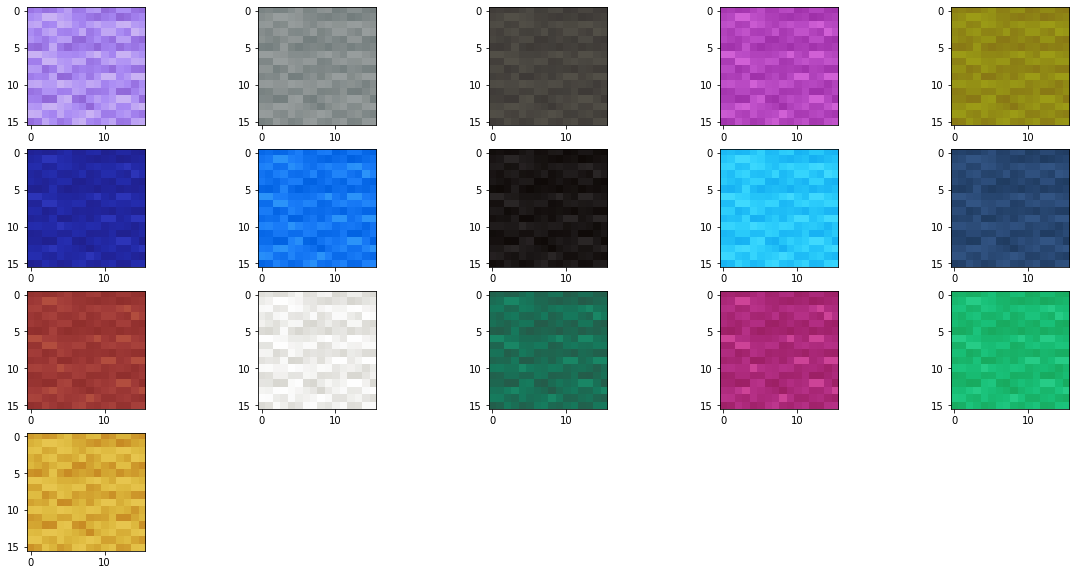

In [12]:
show_images_glob(images)


### run mosaic art

In [ ]:
# %cd /content

In [13]:
import numpy as np
import cv2
import glob

### select material images

In [14]:
# material image list 1
path = r"./dataset/blocks/wool_*.png"
file_path = glob.glob(path)
# material image list 2
path2 = R"./dataset/blocks/*block.png"
file_path2 = glob.glob(path2)

# append material image lists
file_path.extend(file_path2)

## show material image path
# import pprint
# pprint.pprint(file_path)



## directly select material images
# IMG_PATH = './images/*.png'                  # material image path
# IMG_PATH = R"./dataset/blocks/*.png"        # material image path
# IMG_PATH = R"./dataset/blocks/wool_*.png"  # filtering wool textures using wildcard

### select target image

In [15]:
# INPUT_PATH = R"./dataset/target.png"  # target image path
INPUT_PATH = R"./mosaic_art/target.jpg"  # target image path
MULTIPLY = 15                             # magnify target image: 5 => 10

In [ ]:
files = file_path                      # 1) select files from material image list
# files = glob.glob('./images/*.png')  # 2) select files here
# files = glob.glob(IMG_PATH)        # 3) select files from defined path

size = 50    # resize into 50x50
 
small_img = []
 
for file in files:
    image = cv2.imread(file)
    image = cv2.resize(image, (size, size))
    image = image /255
    small_img.append(image)
 
small_img = np.asarray(small_img)
pic_filename = INPUT_PATH                 # target image path
 
big_img = cv2.imread(pic_filename)
height = (big_img.shape[0] - big_img.shape[0] % size) * 2 * MULTIPLY
width = (big_img.shape[1] - big_img.shape[1] % size) * 2 * MULTIPLY
 
big_img = big_img / 255
big_img = np.asarray(big_img)
big_img = cv2.resize(big_img, (width, height))
 
for i in range(int(height / size)):
    print('%d / %d' %(i + 1, int(height / size)))
 
    for j in range(int(width / size)):
        cut = big_img[size * i: size * (i + 1), size * j: size * (j + 1)]
        losses = [] 
        
        # search marial image (small_img) similar to target image color
        for s_img in small_img:
            loss = cut - s_img
            loss = loss * loss
            loss = np.sum(loss)
            losses.append(loss) 
     
        losses = np.asarray(losses)
        big_img[size * i: size * (i + 1), size * j: size * (j + 1)] = small_img[np.argmin(losses)]
 
big_img = (big_img * 255).astype(np.int64)
cv2.imwrite('./output/out.png', big_img)

### show generated image

In [18]:
# from IPython.display import *
# print("<<generated image>>")
# display_png(Image('/content/output/out.png'))

<<generated image>>


### colab2drive

In [17]:
!cp "./output/out.png" "./gdrive/MyDrive/out.png"
print("----- copied image file to google drive (^o^)/ -----")

----- copied image file to google drive (^o^)/ -----


### colab2localPC

In [ ]:
# from google.colab import files
# files.download('./output/out.png')
# print(">>>--->>>--->>> now downloading image file (^o^)/ >>>--->>>--->>>")